In [1]:
import numpy as np
from data_analysis_codes.tools import LCDM
evo = LCDM.evo()
from data_analysis_codes.tools import Amplitudes as A
from data_analysis_codes.tools import AmplitudesK as AK
from data_analysis_codes.tools import ReadingTools as RRead
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [2]:
def dichotomomy(y_wanted, function, lower_bound, upper_bound, tolerance):
    x_low = lower_bound
    x_upp = upper_bound
    x_mid = (x_low + x_upp) / 2
    y_low = function(x_low)
    y_upp = function(x_upp)
    y_mid = function(x_mid)
    while abs(y_wanted / y_mid - 1) > tolerance:
        if y_wanted > y_mid:
            y_low = y_mid
            x_low = x_mid
            x_mid = (x_low + x_upp) / 2
            y_mid = function(x_mid)
        else:
            y_upp = y_mid
            x_upp = x_mid
            x_mid = (x_low + x_upp) / 2
            y_mid = function(x_mid)
    return x_mid

## Just change tIN

In [51]:
# 1st just change tIn and dtfac
tIN = 1
aIN = evo.a(tIN)
deltaIN = 0.03

print('TA')
deltaTA = 1.06
anTA = deltaTA/deltaIN
tTA = tIN*(anTA)**(3/2)
aTA = evo.a(tTA)
print(tTA)

dtfacIN = 0.0006
# dt = fac * a * dx
# dtfac = fac * a
# fac = dtfac / a
fac = dtfacIN / aIN
dtfacTA = fac * aTA
print(dtfacTA)

print('New tIN')
tIN_new = 200
aIN_new = evo.a(tIN_new)
dtfac_new = fac * aIN_new
print(tIN_new, dtfac_new)

TA
210.027864112607
0.02120809156535989
New tIN
200 0.02052681318551482


In [52]:
tIN = 1
L = 1821
Amp_pert = 0.01138486133517004756
deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp_pert]*3)
print(deltaOD, (gdetOD**(1/3))*RicciSOD)
print(MassTot)

0.029999999999999583 1.5552033835920128e-06
3.1865949545724727e+19


In [53]:
tIN = 200
L = 1821
Amp_pert = 0.01138486133517004756
deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp_pert]*3)
print(deltaOD, (gdetOD**(1/3))*RicciSOD)

20.47257611124472 5.426179683287306e-06


## Change Amp for given tIn to match $\delta_{OD}$

In [54]:
param = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')
Lin = LinData.LinData_Class(param)
f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')

 read time file


In [55]:
tIN = np.arange(1, 400, 10)
deltaODIN = [A.f_Amp(t, [L]*3, [Amp_pert]*3)[0] for t in tIN]

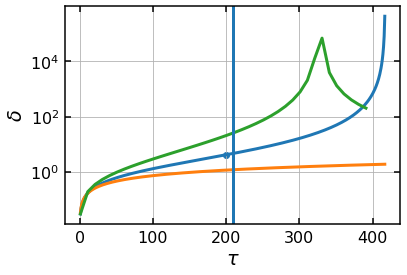

In [56]:
plt.semilogy(f['t'], f['drho_OD'], label='nonlin sim result')
plt.semilogy(f['t'], Lin.delta(f['t'], 'OD'), label='1st order prediction')
plt.semilogy(tIN, deltaODIN, label='same IC just vary tIN')
plt.grid()
plt.axvline(x=tTA)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\delta$')
deltaOD_wanted = 4.1256343925
plt.scatter(200, deltaOD_wanted)

In [58]:
def get_delta(Amp):
    tIN = 200
    L = 1821
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp]*3)
    return deltaOD

In [59]:
Amp_wanted = dichotomomy(deltaOD_wanted, get_delta, 0.001, 0.1, 1e-7)
print(Amp_wanted)
tIN = 200
L = 1821
deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp_wanted]*3)
print(deltaOD, deltaOD_wanted)

locconfR = (f['gdet_OD']**(1/3))*f['RicciS_OD']
aR_wanted = np.mean(locconfR[:350])
print((gdetOD**(1/3))*RicciSOD, aR_wanted)

0.007810051407665015
4.125634518126491 4.1256343925
2.1472652214072455e-06 1.5535549472643465e-06


## Change Amp for given tIn to match ${\gamma_{OD}}^{\frac{1}{3}}\;{}^{(3)}R$

In [60]:
def get_aR(Amp):
    tIN = 200
    L = 1821
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp]*3)
    aR = (gdetOD**(1/3))*RicciSOD
    return aR

In [61]:
Amp_wanted = dichotomomy(aR_wanted, get_aR, 0.001, 0.02, 1e-7)
print(Amp_wanted)
tIN = 200
L = 1821
deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp_wanted]*3)
print(deltaOD, deltaOD_wanted)

locconfR = (f['gdet_OD']**(1/3))*f['RicciS_OD']
aR_wanted = np.mean(locconfR[:350])
print((gdetOD**(1/3))*RicciSOD, aR_wanted)

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


0.006516082435846328
2.4640610686952176 4.1256343925
1.5535548951610432e-06 1.5535549472643465e-06


## Change Amp for given tIn to match $K_{OD}$

In [62]:
def get_K(Amp):
    tIN = 200
    L = 1821
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp]*3)
    aR = (gdetOD**(1/3))*RicciSOD
    return KOD

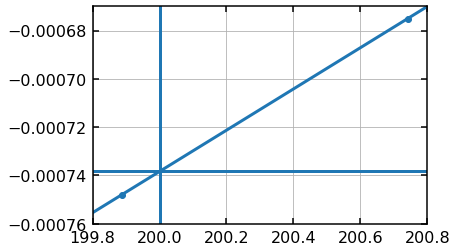

In [63]:
a = (f['K_OD'][234]-f['K_OD'][233])/(f['t'][234]-f['t'][233])
b = f['K_OD'][233] - a*f['t'][233]

plt.scatter([f['t'][233], f['t'][234]], [f['K_OD'][233], f['K_OD'][234]])
plt.plot(f['t'], a*f['t']+b)
K_wanted = a * 200 + b
plt.axhline(y = K_wanted)
plt.axvline(x = 200)
plt.xlim(199.8, 200.8)
plt.ylim(-7.6e-4, -6.7e-4)
plt.grid()

In [64]:
K_wanted

-0.0007383398800928087

In [65]:
Amp_wanted = dichotomomy(K_wanted, get_K, 0.001, 0.02, 1e-7)
print(Amp_wanted)
tIN = 200
L = 1821
deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp_wanted]*3)
print(deltaOD, deltaOD_wanted)

locconfR = (f['gdet_OD']**(1/3))*f['RicciS_OD']
aR_wanted = np.mean(locconfR[:350])
print((gdetOD**(1/3))*RicciSOD, aR_wanted)

print(KOD, K_wanted)

/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


0.01021585144288838
11.49182129121758 4.1256343925
3.927009580906676e-06 1.5535549472643465e-06
-0.0007383398770522973 -0.0007383398800928087


# Chose $A_{pert}$ for ${\gamma_{OD}}^{\frac{1}{3}}\;{}^{(3)}R$ and $A_{pertK}$ for $\delta$

In [66]:
def get_delta(AmpK):
    Amp = 0.006516082435846328
    tIN = 200
    L = 1821
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = AK.f_Amp(tIN, [L]*3, [Amp]*3, [AmpK]*3)
    aR = (gdetOD**(1/3))*RicciSOD
    return deltaOD

def get_K(AmpK):
    Amp = 0.006516082435846328
    tIN = 200
    L = 1821
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = AK.f_Amp(tIN, [L]*3, [Amp]*3, [AmpK]*3)
    aR = (gdetOD**(1/3))*RicciSOD
    return KOD

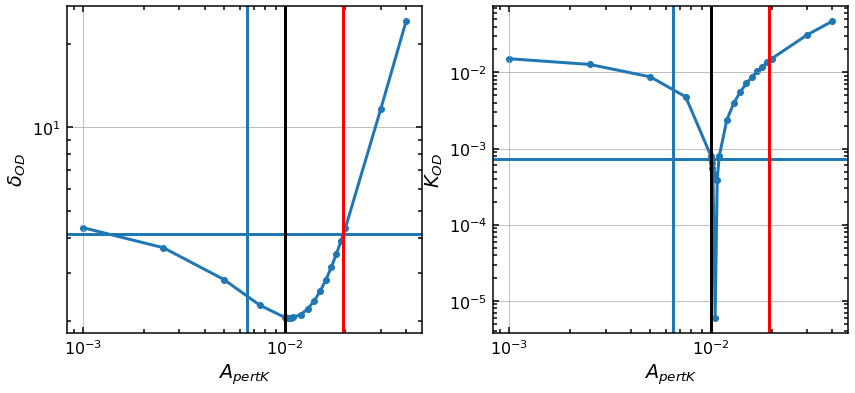

In [67]:
AmpK = np.array([1e-3, 2.5e-3, 5e-3, 7.5e-3, 
                 1e-2, 1.005e-2,
                 1.01e-2, 1.015e-2,
                 1.02e-2, 1.021e-2, 1.022e-2, 1.023e-2, 1.025e-2, 
                 1.05e-2, 1.075e-2, 1.1e-2, 1.2e-2, 1.3e-2, 1.4e-2, 
                 1.5e-2, 1.6e-2, 1.7e-2, 1.8e-2, 1.9e-2, 2e-2, 3e-2, 4e-2])
dK = np.array([get_delta(A) for A in AmpK])
KK = np.array([get_K(A) for A in AmpK])

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.loglog(AmpK, dK)
plt.scatter(AmpK, dK)
plt.axhline(y=4.1256343925)
plt.axvline(x=0.006516082435846328)
plt.axvline(x=0.010039551025629041, color='k')
plt.axvline(x=0.01953259008407593, color='r')
plt.xlabel(r'$A_{pertK}$')
plt.ylabel(r'$\delta_{OD}$')
plt.grid()
#plt.ylim(10, 20)

plt.subplot(122)
plt.loglog(AmpK, abs(KK))
plt.scatter(AmpK, abs(KK))
plt.axhline(y=0.0007383398800928087)
plt.axvline(x=0.006516082435846328)
plt.axvline(x=0.010039551025629041, color='k')
plt.axvline(x=0.01953259008407593, color='r')
plt.xlabel(r'$A_{pertK}$')
plt.ylabel(r'$K_{OD}$')
plt.grid()
#plt.xlim(9e-3, 1.2e-2)
#plt.ylim(3e-4, 2e-3)

In [68]:
delta_wanted = 4.1256343925
K_wanted = -0.0007383398800928087

AmpK_wanted_delta = dichotomomy(delta_wanted, get_delta, 0.00001, 0.02, 1e-7)
print(AmpK_wanted_delta)

AmpK_wanted_K = dichotomomy(K_wanted, get_K, 0.00001, 0.02, 1e-7)
print(AmpK_wanted_K)

0.01953259008407593
0.010039551025629041


# Change $A_{pert}$ for ${}^{(3)}R$ and $A_{pertK}$ for $K$

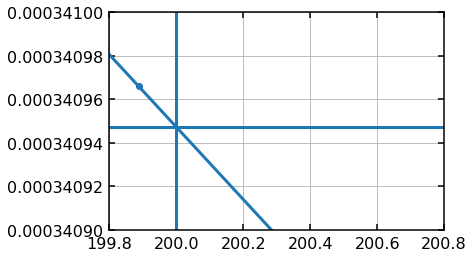

In [69]:
a = (f['RicciS_OD'][234]-f['RicciS_OD'][233])/(f['t'][234]-f['t'][233])
b = f['RicciS_OD'][233] - a*f['t'][233]

plt.scatter([f['t'][233], f['t'][234]], [f['RicciS_OD'][233], f['RicciS_OD'][234]])
plt.plot(f['t'], a*f['t']+b)
R3_wanted = a * 200 + b
plt.axhline(y = R3_wanted)
plt.axvline(x = 200)
plt.xlim(199.8, 200.8)
plt.ylim(0.0003409, 0.0003410)
plt.grid()

In [70]:
R3_wanted

0.00034094722826609545

In [71]:
def get_R(Amp):
    tIN = 200
    L = 1821
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp]*3)
    return RicciSOD

R3_wanted = 0.00034094722826609545
Amp_wanted = dichotomomy(R3_wanted, get_R, 0.001, 0.02, 1e-7)

deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tIN, [L]*3, [Amp_wanted]*3)
print(Amp_wanted)
print(deltaOD, deltaOD_wanted)
print(RicciSOD, R3_wanted)
print(KOD, K_wanted)

0.007938653588294983
4.34486975285202 4.1256343925
0.00034094724421423903 0.00034094722826609545
-0.004777342255277027 -0.0007383398800928087


In [72]:
def get_K(AmpK):
    Amp = 0.007938653588294983
    tIN = 200
    L = 1821
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = AK.f_Amp(tIN, [L]*3, [Amp]*3, [AmpK]*3)
    return KOD

K_wanted = -0.0007383398800928087
AmpK_wanted = dichotomomy(K_wanted, get_K, 0.001, 0.02, 1e-7)

deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = AK.f_Amp(tIN, [L]*3, [Amp_wanted]*3, [AmpK_wanted]*3)
print(AmpK_wanted)
print(deltaOD, deltaOD_wanted)
print(RicciSOD, R3_wanted)
print(KOD, K_wanted)

0.01010733900219202
4.12185982564065 4.1256343925
0.00034094724421423903 0.00034094722826609545
-0.0007383399156892629 -0.0007383398800928087


In [73]:
MassTot

3.024553150238998e+19

# Start at TA

In [9]:
tIN = 1
deltaIN = 0.03
deltaTA = 3*((6*np.pi)**(2/3))/20
tTA = tIN*(deltaTA/deltaIN)**(3/2)
print(tTA)
L = 1821
def get_R(Amp):
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = A.f_Amp(tTA, [L]*3, [Amp]*3)
    return RicciSOD

rho = evo.rho(tTA)*(1+deltaTA)
R3_wanted = 2*evo.kappa*rho - 2*evo.Lambda
Amp_wanted = dichotomomy(R3_wanted, get_R, 0.001, 0.02, 1e-15)
print(Amp_wanted)

210.74444193122176
0.005224680357251814


In [11]:
def get_K(AmpK):
    deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = AK.f_Amp(tTA, [L]*3, [Amp_wanted]*3, [AmpK]*3)
    return KOD

K_wanted = 0.0
AmpK_wanted = dichotomomy(K_wanted, get_K, 0.001, 0.02, 1e-7)

deltaOD, delta1OD, MassTot, MassOD, gdetOD, RicciSOD, KOD = AK.f_Amp(tTA, [L]*3, [Amp_wanted]*3, [AmpK_wanted]*3)

fac = 0.0006 / evo.a(1.0)
dtfacTA = fac * evo.a(tTA)
print(tTA, dtfacTA, Amp_wanted, AmpK_wanted)
print(deltaTA, deltaOD)
print(R3_wanted, RicciSOD)
print(K_wanted, KOD)

210.74444193122176 0.02125635844697865 0.005224680357251814 0.010122724423143954
1.062409652400136 1.0554848894499966
0.0001234812740478533 0.00012348127404785325
0.0 0.0


/opt/apps/pkgs/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
